Hecho por: Karla García Ávila

###Ejercicio 2:

a) Trace la gráfica de estos datos.

<ipython-input-13-4ce2b8106de7>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  ax.plot(z , w, "b-o",color = "darkcyan", label = 'Función', linewidth = 1)


<function matplotlib.pyplot.show(close=None, block=None)>

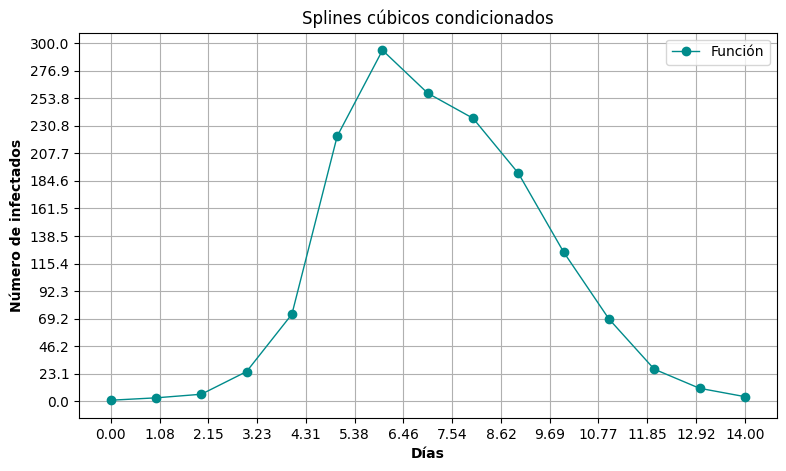

In [13]:

w = [1,3,6,25,73,222,294,258,237,191,125,69,27,11,4]
z = np.linspace(0,14,15)
fig, ax = plt.subplots(figsize = (9,5))
ax.set_title ("Splines cúbicos condicionados", fontsize = 12)
ax.plot(z , w, "b-o",color = "darkcyan", label = 'Función', linewidth = 1)
ax.set_xlabel("Días", fontweight = "bold", fontsize = "10")
ax.set_ylabel("Número de infectados", fontweight = "bold", fontsize = "10")
plt.xticks(np.linspace(0, 14 , 14))
plt.yticks(np.linspace(0,300, 14))
ax.grid(True)
plt.savefig("output.png")
ax.legend(loc = "upper right")
plt.show

b) Use su splines cúbicos para trazar una curva suave sobre los mismos datos.

In [1]:
from numpy.core.multiarray import zeros
import numpy as np

d = int(input("¿Cuántos datos ingresará?: "))

b, A, a, y, h, h2, D, B, deri =  np.zeros((d,1), dtype = np.float32), np.zeros((d,d), dtype = np.float32), [],[],[],[],[],[],[]

for z in range(d):
  pr = float(input(f'Ingrese el valor de x{z}:  ')) #Valores de x
  y.append(pr)
  pr1 = float(input(f'Ingrese el valor de f(x{z}):  ')) #Valores de x en la función
  a.append(pr1)
  if z == 0 or z == d-1:
    pr2 = float(input(f'Ingrese el valor de f¹(x{z}):  ')) #Valores de la derivada de la función
    deri.append(pr2)

for n in range(len(y)-2): #Diferencias, h
  nuevo = []
  h0 = y[n+1]-y[n]
  h1 = y[n+2]-y[n+1]
  nuevo.append(h0)
  nuevo.append(2*(h0+h1))
  nuevo.append(h1)
  h.append(nuevo)

for m in range(len(y)-1):#Diferencias h2
  h3 = y[m+1]-y[m]
  h2.append(h3)

p = 1
for j in range(d):#Matriz A (llenado)
  if j == 0:
    A[0][0] = 2*h2[0]
    A[0][1] = h2[0]
  elif j == 1:
    for i in range(j+2):
      A[j][i] = h[0][i]
  elif j == d-1:
    A[j][j] = 2*h2[-2]
    A[j][j-1] = h2[-2]
  else:
    for i in range(3):
      A[j][i+p] = h[j-1][i]
    p += 1

for k in range(d):#Vector b (llenado)
  if k == 0:
    sum1 = 3/h2[k]*(a[k+1]-a[k])
    sum2 = 3*deri[0]
    b[k][0] = round(sum1-sum2,4)
  elif k == d-1 :
    sum1 = 3/h2[k-1]*(a[k]-a[k-1])
    sum2 = 3*deri[1]
    b[k][0] = round(sum2-sum1,4)
  else:
    sum1 = 3/h2[k]*(a[k+1]-a[k])
    sum2 = 3/h2[k-1]*(a[k]-a[k-1])
    b[k][0] = round(sum1 - sum2,4)

x = np.linalg.inv(A)#Valores de c
x1 = x.dot(b)

for f in range(len(x1)-1): #Calculamos los dj
  dj = (x1[f+1][0]-x1[f][0])/3*h2[f]
  D.append(round(dj,4))

for w in range(len(x1)-1): #Calculamos los bj
  arr = (a[w+1]-a[w])/h2[w]
  aba =(h2[w]) * (x1[w+1][0]+2*x1[w][0])/3
  B.append(round(arr-aba,4))

¿Cuántos datos ingresará?: 15
Ingrese el valor de x0:  0
Ingrese el valor de f(x0):  1
Ingrese el valor de f¹(x0):  1
Ingrese el valor de x1:  1
Ingrese el valor de f(x1):  3
Ingrese el valor de x2:  2
Ingrese el valor de f(x2):  6
Ingrese el valor de x3:  3
Ingrese el valor de f(x3):  25
Ingrese el valor de x4:  4
Ingrese el valor de f(x4):  73
Ingrese el valor de x5:  5
Ingrese el valor de f(x5):  222
Ingrese el valor de x6:  6
Ingrese el valor de f(x6):  294
Ingrese el valor de x7:  7
Ingrese el valor de f(x7):  258
Ingrese el valor de x8:  8
Ingrese el valor de f(x8):  237
Ingrese el valor de x9:  9
Ingrese el valor de f(x9):  191
Ingrese el valor de x10:  10
Ingrese el valor de f(x10):  125
Ingrese el valor de x11:  11
Ingrese el valor de f(x11):  69
Ingrese el valor de x12:  12
Ingrese el valor de f(x12):  27
Ingrese el valor de x13:  13
Ingrese el valor de f(x13):  11
Ingrese el valor de x14:  14
Ingrese el valor de f(x14):  4
Ingrese el valor de f¹(x14):  4


In [2]:
print("El spline cúbico condicionado se describe por tramos mediante: ")
print("\n")
for g in range(d):
  r = round(x1[g][0],4)
  x1[g] = r
fun = []
for q in range(d-1):#Spline cubico por partes
  Spline = [f'{a[q]}']
  Spline.append(f'+ {B[q]} *')
  Spline.append(f'(x - {y[q]} )')
  Spline.append(f'+ {x1[q][0]} *')
  Spline.append(f'(x - {y[q]} )**2')
  Spline.append(f'+ {D[q]} *')
  Spline.append(f'(x - {y[q]} )**3')
  print(' '.join(Spline))
  fun.append(' '.join(Spline))


El spline cúbico condicionado se describe por tramos mediante: 


1.0 + 1.0 * (x - 0.0 ) + 3.3046000003814697 * (x - 0.0 )**2 + -2.3046 * (x - 0.0 )**3
3.0 + 0.6954 * (x - 1.0 ) + -3.6092000007629395 * (x - 1.0 )**2 + 5.9139 * (x - 1.0 )**3
6.0 + 11.2185 * (x - 2.0 ) + 14.13230037689209 * (x - 2.0 )**2 + -6.3508 * (x - 2.0 )**3
25.0 + 20.4307 * (x - 3.0 ) + -4.920100212097168 * (x - 3.0 )**2 + 32.4893 * (x - 3.0 )**3
73.0 + 108.0586 * (x - 4.0 ) + 92.5479965209961 * (x - 4.0 )**2 + -51.6066 * (x - 4.0 )**3
222.0 + 138.3348 * (x - 5.0 ) + -62.27180099487305 * (x - 5.0 )**2 + -4.0631 * (x - 5.0 )**3
294.0 + 1.6021 * (x - 6.0 ) + -74.46089935302734 * (x - 6.0 )**2 + 36.8588 * (x - 6.0 )**3
258.0 + -36.7434 * (x - 7.0 ) + 36.11539840698242 * (x - 7.0 )**2 + -20.3721 * (x - 7.0 )**3
237.0 + -25.6287 * (x - 8.0 ) + -25.00079917907715 * (x - 8.0 )**2 + 4.6295 * (x - 8.0 )**3
191.0 + -61.7418 * (x - 9.0 ) + -11.112299919128418 * (x - 9.0 )**2 + 6.8541 * (x - 9.0 )**3
125.0 + -63.4041 * (x - 10

In [3]:
import math
def crear_funcion(facil):
    num_fun = d-1
    funciones = []
    for i in range(num_fun):
        fun_name = input(f'Ingrese el nombre de la función {i+1}: ')
        fun_expres = facil[i]
        codigo = f'def {fun_name}(x):\n    return {fun_expres}'
        funciones.append(codigo)

    generar_fun = "\n\n".join(funciones)
    print("\nGenerando funciones:\n")
    print(generar_fun)

    exec(generar_fun, globals())
    print("\nFuncion generada")

crear_funcion(fun)

Ingrese el nombre de la función 1: f1
Ingrese el nombre de la función 2: f2
Ingrese el nombre de la función 3: f3
Ingrese el nombre de la función 4: f4
Ingrese el nombre de la función 5: f5
Ingrese el nombre de la función 6: f6
Ingrese el nombre de la función 7: f7
Ingrese el nombre de la función 8: f8
Ingrese el nombre de la función 9: f9
Ingrese el nombre de la función 10: f10
Ingrese el nombre de la función 11: f11
Ingrese el nombre de la función 12: f12
Ingrese el nombre de la función 13: f13
Ingrese el nombre de la función 14: f14

Generando funciones:

def f1(x):
    return 1.0 + 1.0 * (x - 0.0 ) + 3.3046000003814697 * (x - 0.0 )**2 + -2.3046 * (x - 0.0 )**3

def f2(x):
    return 3.0 + 0.6954 * (x - 1.0 ) + -3.6092000007629395 * (x - 1.0 )**2 + 5.9139 * (x - 1.0 )**3

def f3(x):
    return 6.0 + 11.2185 * (x - 2.0 ) + 14.13230037689209 * (x - 2.0 )**2 + -6.3508 * (x - 2.0 )**3

def f4(x):
    return 25.0 + 20.4307 * (x - 3.0 ) + -4.920100212097168 * (x - 3.0 )**2 + 32.4893 * (x 

In [4]:
import math
def crear_rangos(y):
    num_fun = d-1
    rangos = []
    for i in range(num_fun):
        fun_name = input(f'Ingrese el nombre de la lista {i+1}: ')
        codigo = f'{fun_name} =  np.linspace({y[i]}, {y[i+1]}, 20)'
        rangos.append(codigo)

    generar_fun = "\n\n".join(rangos)
    print("\nGenerando rangos:\n")
    print(generar_fun)

    exec(generar_fun, globals())
crear_rangos(y)

Ingrese el nombre de la lista 1: a
Ingrese el nombre de la lista 2: b
Ingrese el nombre de la lista 3: c
Ingrese el nombre de la lista 4: d
Ingrese el nombre de la lista 5: e
Ingrese el nombre de la lista 6: f
Ingrese el nombre de la lista 7: g
Ingrese el nombre de la lista 8: h
Ingrese el nombre de la lista 9: i
Ingrese el nombre de la lista 10: j
Ingrese el nombre de la lista 11: k
Ingrese el nombre de la lista 12: l
Ingrese el nombre de la lista 13: m
Ingrese el nombre de la lista 14: n

Generando rangos:

a =  np.linspace(0.0, 1.0, 20)

b =  np.linspace(1.0, 2.0, 20)

c =  np.linspace(2.0, 3.0, 20)

d =  np.linspace(3.0, 4.0, 20)

e =  np.linspace(4.0, 5.0, 20)

f =  np.linspace(5.0, 6.0, 20)

g =  np.linspace(6.0, 7.0, 20)

h =  np.linspace(7.0, 8.0, 20)

i =  np.linspace(8.0, 9.0, 20)

j =  np.linspace(9.0, 10.0, 20)

k =  np.linspace(10.0, 11.0, 20)

l =  np.linspace(11.0, 12.0, 20)

m =  np.linspace(12.0, 13.0, 20)

n =  np.linspace(13.0, 14.0, 20)


<ipython-input-9-28854434500b>:94: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  ax.plot(z , w, "b-o",color = "black", label = 'Función', linewidth = 1)


<function matplotlib.pyplot.show(close=None, block=None)>

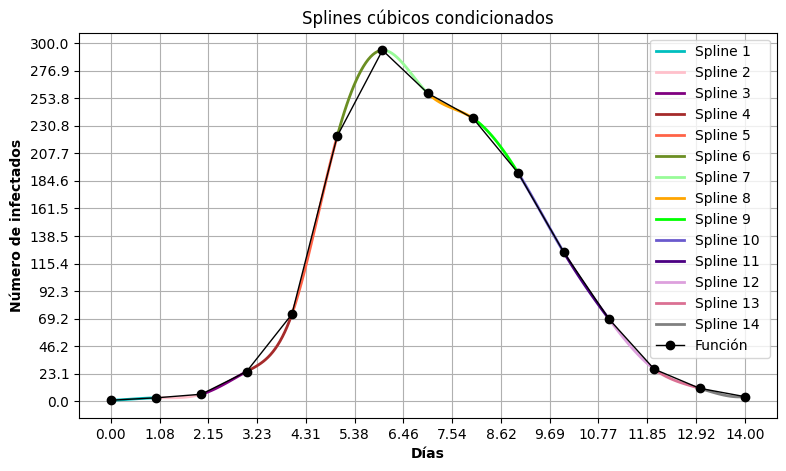

In [9]:
#Creación de gráfica
import matplotlib.pyplot as plt
import numpy as np

def f1(x):
    return 1.0 + 1.0 * (x - 0.0 ) + 3.3046000003814697 * (x - 0.0 )**2 + -2.3046 * (x - 0.0 )**3

def f2(x):
    return 3.0 + 0.6954 * (x - 1.0 ) + -3.6092000007629395 * (x - 1.0 )**2 + 5.9139 * (x - 1.0 )**3

def f3(x):
    return 6.0 + 11.2185 * (x - 2.0 ) + 14.13230037689209 * (x - 2.0 )**2 + -6.3508 * (x - 2.0 )**3

def f4(x):
    return 25.0 + 20.4307 * (x - 3.0 ) + -4.920100212097168 * (x - 3.0 )**2 + 32.4893 * (x - 3.0 )**3

def f5(x):
    return 73.0 + 108.0586 * (x - 4.0 ) + 92.5479965209961 * (x - 4.0 )**2 + -51.6066 * (x - 4.0 )**3

def f6(x):
    return 222.0 + 138.3348 * (x - 5.0 ) + -62.27180099487305 * (x - 5.0 )**2 + -4.0631 * (x - 5.0 )**3

def f7(x):
    return 294.0 + 1.6021 * (x - 6.0 ) + -74.46089935302734 * (x - 6.0 )**2 + 36.8588 * (x - 6.0 )**3

def f8(x):
    return 258.0 + -36.7434 * (x - 7.0 ) + 36.11539840698242 * (x - 7.0 )**2 + -20.3721 * (x - 7.0 )**3

def f9(x):
    return 237.0 + -25.6287 * (x - 8.0 ) + -25.00079917907715 * (x - 8.0 )**2 + 4.6295 * (x - 8.0 )**3

def f10(x):
    return 191.0 + -61.7418 * (x - 9.0 ) + -11.112299919128418 * (x - 9.0 )**2 + 6.8541 * (x - 9.0 )**3

def f11(x):
    return 125.0 + -63.4041 * (x - 10.0 ) + 9.449999809265137 * (x - 10.0 )**2 + -2.0459 * (x - 10.0 )**3

def f12(x):
    return 69.0 + -50.6418 * (x - 11.0 ) + 3.3124001026153564 * (x - 11.0 )**2 + 5.3294 * (x - 11.0 )**3

def f13(x):
    return 27.0 + -28.0289 * (x - 12.0 ) + 19.300500869750977 * (x - 12.0 )**2 + -7.2716 * (x - 12.0 )**3

def f14(x):
    return 11.0 + -11.2428 * (x - 13.0 ) + -2.514400005340576 * (x - 13.0 )**2 + 6.7572 * (x - 13.0 )**3

a =  np.linspace(0.0, 1.0, 20)

b =  np.linspace(1.0, 2.0, 20)

c =  np.linspace(2.0, 3.0, 20)

d =  np.linspace(3.0, 4.0, 20)

e =  np.linspace(4.0, 5.0, 20)

f =  np.linspace(5.0, 6.0, 20)

g =  np.linspace(6.0, 7.0, 20)

h =  np.linspace(7.0, 8.0, 20)

i =  np.linspace(8.0, 9.0, 20)

j =  np.linspace(9.0, 10.0, 20)

k =  np.linspace(10.0, 11.0, 20)

l =  np.linspace(11.0, 12.0, 20)

m =  np.linspace(12.0, 13.0, 20)

n =  np.linspace(13.0, 14.0, 20)

x = np.linspace(y[0],y[-1],20)
w = [1,3,6,25,73,222,294,258,237,191,125,69,27,11,4]
z = np.linspace(y[0],y[-1],15)
fig, ax = plt.subplots(figsize = (9,5))
ax.set_title ("Splines cúbicos condicionados", fontsize = 12)
ax.plot(a, [f1(i) for i in a], color = "c", label = 'Spline 1', linewidth = 2)
ax.plot(b, [f2(i) for i in b] , color = "pink", label = 'Spline 2', linewidth = 2)
ax.plot(c, [f3(i) for i in c], color = "purple", label = 'Spline 3', linewidth = 2)
ax.plot(d, [f4(i) for i in d], color = "brown", label = 'Spline 4', linewidth = 2)
ax.plot(e, [f5(i) for i in e], color = "tomato", label = 'Spline 5 ', linewidth = 2)
ax.plot(f, [f6(i) for i in f], color = "olivedrab", label = 'Spline 6 ', linewidth = 2)
ax.plot(g, [f7(i) for i in g] , color = "palegreen", label = 'Spline 7', linewidth = 2 )
ax.plot(h, [f8(i) for i in h], color = "orange", label = 'Spline 8 ', linewidth = 2)
ax.plot(i, [f9(i) for i in i], color = "lime", label = 'Spline 9', linewidth = 2)
ax.plot(j, [f10(i) for i in j] , color = "slateblue", label = 'Spline 10 ', linewidth = 2)
ax.plot(k, [f11(i) for i in k], color = "indigo", label = 'Spline 11 ', linewidth = 2)
ax.plot(l, [f12(i) for i in l], color = "plum", label = 'Spline 12 ', linewidth = 2)
ax.plot(m, [f13(i) for i in m] , color = "palevioletred", label = 'Spline 13', linewidth = 2)
ax.plot(n, [f14(i) for i in n], color = "gray", label = 'Spline 14', linewidth = 2)
ax.plot(z , w, "b-o",color = "black", label = 'Función', linewidth = 1)
ax.set_xlabel("Días", fontweight = "bold", fontsize = "10")
ax.set_ylabel("Número de infectados", fontweight = "bold", fontsize = "10")
plt.xticks(np.linspace(0, 14 , 14))
plt.yticks(np.linspace(y[0],300, 14))
ax.grid(True)
plt.savefig("output.png")
ax.legend(loc = "upper right")
plt.show